
# Predicting Nutrient Gaps : Zindi Competition


# Step one: Importing Libraries and loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install catboost
# Install the necessary libraries
!pip install -q gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.5 MB/s eta 0:00:00


In [6]:
# Urls for the data
url_train = "https://drive.google.com/file/d/1ZldwOOTfFWGKs9y3wdN66kZDJt9YMvVc/view?usp=drive_link"
url_test = "https://drive.google.com/file/d/1FmOT2MFtgRk3HprVB69IMzxF1x8xNUGf/view?usp=drive_link"
url_var_def = "https://drive.google.com/file/d/1vV_YLDG2djaZAEWmjQMLRQGAYBOtMOw1/view?usp=sharing"

In [7]:
import gdown
# Importing the train data
file_id = '1ZldwOOTfFWGKs9y3wdN66kZDJt9YMvVc'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'train_file.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ZldwOOTfFWGKs9y3wdN66kZDJt9YMvVc
To: /content/train_file.csv
100%|██████████| 3.55M/3.55M [00:00<00:00, 150MB/s]


'train_file.csv'

In [8]:
# Loading train data in the notebook
train_df = pd.read_csv('/content/train_file.csv')
train_df.head()

,site,PID,lon,lat,pH,alb,bio1,bio12,bio15,bio7,...,P,K,Ca,Mg,S,Fe,Mn,Zn,Cu,B
0,site_id_bIEHwl,ID_I5RGjv,70.603761,46.173798,7.75,176,248,920,108,190,...,0.34,147,6830,2310,5.66,75.2,85.0,0.82,2.98,0.24
1,site_id_nGvnKc,ID_8jWzJ5,70.590479,46.078924,7.10,181,250,1080,113,191,...,11.70,151,1180,235,19.40,96.2,409.0,2.57,4.32,0.10
2,site_id_nGvnKc,ID_UgzkN8,70.582553,46.048820,6.95,188,250,1109,111,191,...,21.80,151,1890,344,11.00,76.7,65.0,1.95,1.24,0.22
3,site_id_nGvnKc,ID_DLLHM9,70.573267,46.021910,7.83,174,250,1149,112,191,...,39.90,201,6660,719,14.90,81.9,73.0,4.90,3.08,0.87
4,site_id_7SA9rO,ID_d009mj,70.585330,46.204336,8.07,188,250,869,114,191,...,1.00,90,7340,1160,8.66,69.4,149.0,0.55,3.03,0.31


In [9]:
# Shape of the data
train_df.shape

(7744, 44)

In [10]:
# Summaru statistics of the data
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
lon,7744.0,70.653017,0.860192,69.300473,69.971547,70.448565,71.323206,73.111835
lat,7744.0,41.973038,1.569701,39.265792,40.746015,41.666340,43.117872,46.460178
pH,7744.0,6.447565,1.002991,3.720000,5.600000,6.370000,7.200000,9.660000
alb,7744.0,139.222882,14.849485,94.000000,129.000000,139.000000,148.000000,208.000000
bio1,7744.0,174.123450,27.681376,78.000000,156.000000,172.000000,189.000000,280.000000
bio12,7744.0,1203.880036,291.677540,500.000000,975.000000,1189.000000,1412.000000,2196.000000
bio15,7744.0,94.766012,18.142568,43.000000,84.000000,95.000000,107.000000,160.000000
bio7,7744.0,159.381586,12.229591,129.000000,152.000000,157.000000,164.000000,200.000000
bp,7744.0,0.442799,0.273370,0.030137,0.186838,0.419025,0.683969,0.961943
cec20,7744.0,42.517691,7.336181,0.000000,38.750000,43.250000,47.000000,78.000000


In [16]:
# Basic information about the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7744 entries, 0 to 7743
Data columns (total 44 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site         7744 non-null   object 
 1   PID          7744 non-null   object 
 2   lon          7744 non-null   float64
 3   lat          7744 non-null   float64
 4   pH           7744 non-null   float64
 5   alb          7744 non-null   int64  
 6   bio1         7744 non-null   int64  
 7   bio12        7744 non-null   int64  
 8   bio15        7744 non-null   int64  
 9   bio7         7744 non-null   int64  
 10  bp           7744 non-null   float64
 11  cec20        7744 non-null   float64
 12  dows         7744 non-null   float64
 13  ecec20       7744 non-null   float64
 14  hp20         7744 non-null   float64
 15  ls           7744 non-null   float64
 16  lstd         7744 non-null   float64
 17  lstn         7744 non-null   float64
 18  mb1          7744 non-null   float64
 19  mb2   

In [17]:
# missing values
train_df.isnull().sum()[train_df.isnull().sum()>0]

,0


In [18]:
# Filling mising values with the mean
train_df.fillna(train_df.mean(numeric_only=True), inplace=True)

In [20]:
# Verifying whether there are missing values
train_df.isnull().sum()[train_df.isnull().sum()>0]

,0


In [21]:
# Importing a multi regressor model
from sklearn.multioutput import MultiOutputRegressor

In [22]:
# Define target columns
target_columns = ['N', 'P', 'K', 'Ca', 'Mg', 'S', 'Fe', 'Mn', 'Zn', 'Cu', 'B']

# Copy original dataframe
df = train_df.copy()

# Separate target and features
X = df.drop(columns=target_columns + ['PID', 'site'])  # Drop only during training
y = df[target_columns]


In [23]:
# Fit a preliminary model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
multi_rf = MultiOutputRegressor(rf)
multi_rf.fit(X, y)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [24]:
# Evaluating the model performance
from sklearn.metrics import mean_squared_error, r2_score

y_pred = final_rf.predict(X_test)

for i, col in enumerate(target_columns):
    mse = mean_squared_error(y_test[col], y_pred[:, i])
    r2 = r2_score(y_test[col], y_pred[:, i])
    print(f"{col} - MSE: {mse:.2f}, R²: {r2:.2f}")




NameError: name 'final_rf' is not defined

### **Cross validation of the model**.
Before we even consider using the train st, Lets see how we can make our results as accurate as possible. WE shall employ cross validation. Cross-validation splits your data into K folds (subsets). The model is trained on K-1 folds and validated on the remaining 1 fold. This repeats K times, and the performance metrics are averaged.

In [25]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, r2_score


In [26]:
# Feature matrix and targets
X = train_df.drop(columns=target_columns + ['PID', 'site']).fillna(train_df.mean(numeric_only=True))
y = train_df[target_columns]

In [27]:
# Custom R2 scorer for multi-output
def multi_output_r2(estimator, X, y_true):
    y_pred = estimator.predict(X)
    return r2_score(y_true, y_pred, multioutput='uniform_average')  # or 'variance_weighted'


In [28]:
# K-Fold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))

In [29]:
# Perform cross-validation
scores = cross_val_score(model, X, y, scoring=make_scorer(multi_output_r2), cv=kf)

# Output scores
print(f"Cross-Validation R² scores: {scores}")
print(f"Average R²: {scores.mean():.3f}")

Cross-Validation R² scores: [nan nan nan nan nan]
Average R²: nan


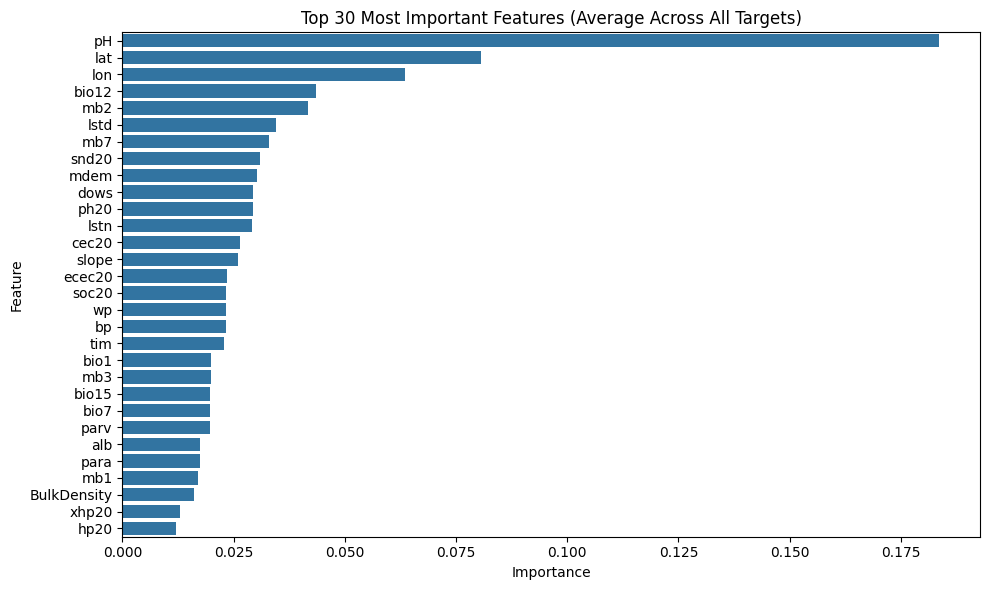

In [30]:
# Calculate average feature importances across all targets
importances = np.array([est.feature_importances_ for est in multi_rf.estimators_])
avg_importance = importances.mean(axis=0)
# Create DataFrame of importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(30))
plt.title("Top 30 Most Important Features (Average Across All Targets)")
plt.tight_layout()
plt.show()


## Loading the test data


In [31]:
# Importing the test Data
file_id = '1FmOT2MFtgRk3HprVB69IMzxF1x8xNUGf'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'test_file.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1FmOT2MFtgRk3HprVB69IMzxF1x8xNUGf
To: /content/test_file.csv
100%|██████████| 970k/970k [00:00<00:00, 53.0MB/s]


'test_file.csv'

In [32]:
# Loading the test data
test_df = pd.read_csv('/content/test_file.csv')
test_df.head()

,site,PID,lon,lat,pH,alb,bio1,bio12,bio15,bio7,...,para,parv,ph20,slope,snd20,soc20,tim,wp,xhp20,BulkDensity
0,site_id_hgJpkz,ID_NGS9Bx,69.170794,44.522885,6.86,144,256,910,108,186,...,37.940418,467.619293,6.825,1.056416,25.50,15.25,8.732471,0.016981,0.005831,1.20
1,site_id_olmuI5,ID_YdVKXw,68.885265,44.741057,7.08,129,260,851,110,187,...,35.961353,542.590149,6.725,0.730379,18.75,14.00,10.565657,0.021030,0.005134,1.24
2,site_id_PTZdJz,ID_MZAlfE,68.970210,44.675777,6.50,142,259,901,109,187,...,38.983898,416.385437,6.825,1.146542,21.00,14.00,9.590125,0.018507,0.004480,1.23
3,site_id_DOTgr8,ID_GwCCMN,69.068751,44.647707,6.82,142,261,847,109,187,...,39.948471,374.971008,6.725,0.567210,23.25,12.25,9.669279,0.021688,0.006803,1.22
4,site_id_1rQNvy,ID_K8sowf,68.990002,44.577607,6.52,145,253,1109,110,186,...,33.658615,361.233643,6.200,1.169207,26.25,18.25,7.895920,0.023016,0.000874,1.23


In [ ]:
# Checking the dimensions of he test data
test_df.shape

(2418, 33)

In [33]:
# Use the trainned model to predict using the ts data
final_rf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
final_rf.fit(X, y)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [40]:
# Drop only identifier columns from test set
X_test = test_df.drop(columns=['PID', 'site'])

In [41]:
# Make predictions
predictions = multi_rf.predict(X_test)


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Predict on your training/validation set
y_pred = multi_rf.predict(X)
y_true = y.values

metrics = []

for i, col in enumerate(target_columns):
    r2 = r2_score(y_true[:, i], y_pred[:, i])
    mae = mean_absolute_error(y_true[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_true[:, i], y_pred[:, i]))  # fixed

    metrics.append({
        "Nutrient": col,
        "R2": r2,
        "MAE": mae,
        "RMSE": rmse
    })

metrics_df = pd.DataFrame(metrics)
print(metrics_df)


   Nutrient        R2         MAE        RMSE
0         N  0.941759  129.401816  180.537247
1         P  0.866228    5.870906   15.249468
2         K  0.925894   45.439106   72.184202
3        Ca  0.976353  353.498647  552.699044
4        Mg  0.956806   79.835518  116.526368
5         S  0.850433    1.362112   11.234496
6        Fe  0.946866   10.927651   15.699365
7        Mn  0.920305   13.940358   19.667165
8        Zn  0.852028    0.357184    1.404032
9        Cu  0.850924    0.346889    1.071451
10        B  0.942364    0.049758    0.081182


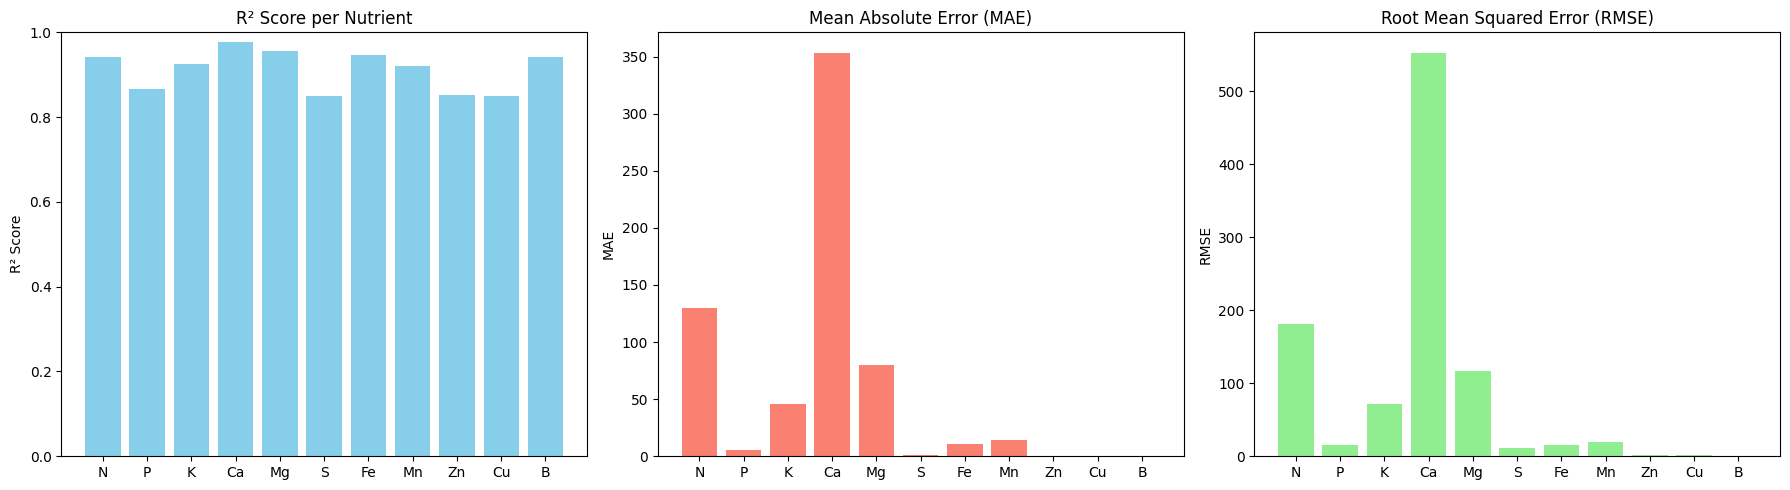

In [53]:
import matplotlib.pyplot as plt

# Plot R2, MAE, RMSE as grouped bar chart
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# R² Score
ax[0].bar(metrics_df['Nutrient'], metrics_df['R2'], color='skyblue')
ax[0].set_title('R² Score per Nutrient')
ax[0].set_ylabel('R² Score')
ax[0].set_ylim(0, 1)

# MAE
ax[1].bar(metrics_df['Nutrient'], metrics_df['MAE'], color='salmon')
ax[1].set_title('Mean Absolute Error (MAE)')
ax[1].set_ylabel('MAE')

# RMSE
ax[2].bar(metrics_df['Nutrient'], metrics_df['RMSE'], color='lightgreen')
ax[2].set_title('Root Mean Squared Error (RMSE)')
ax[2].set_ylabel('RMSE')

plt.tight_layout()
plt.show()


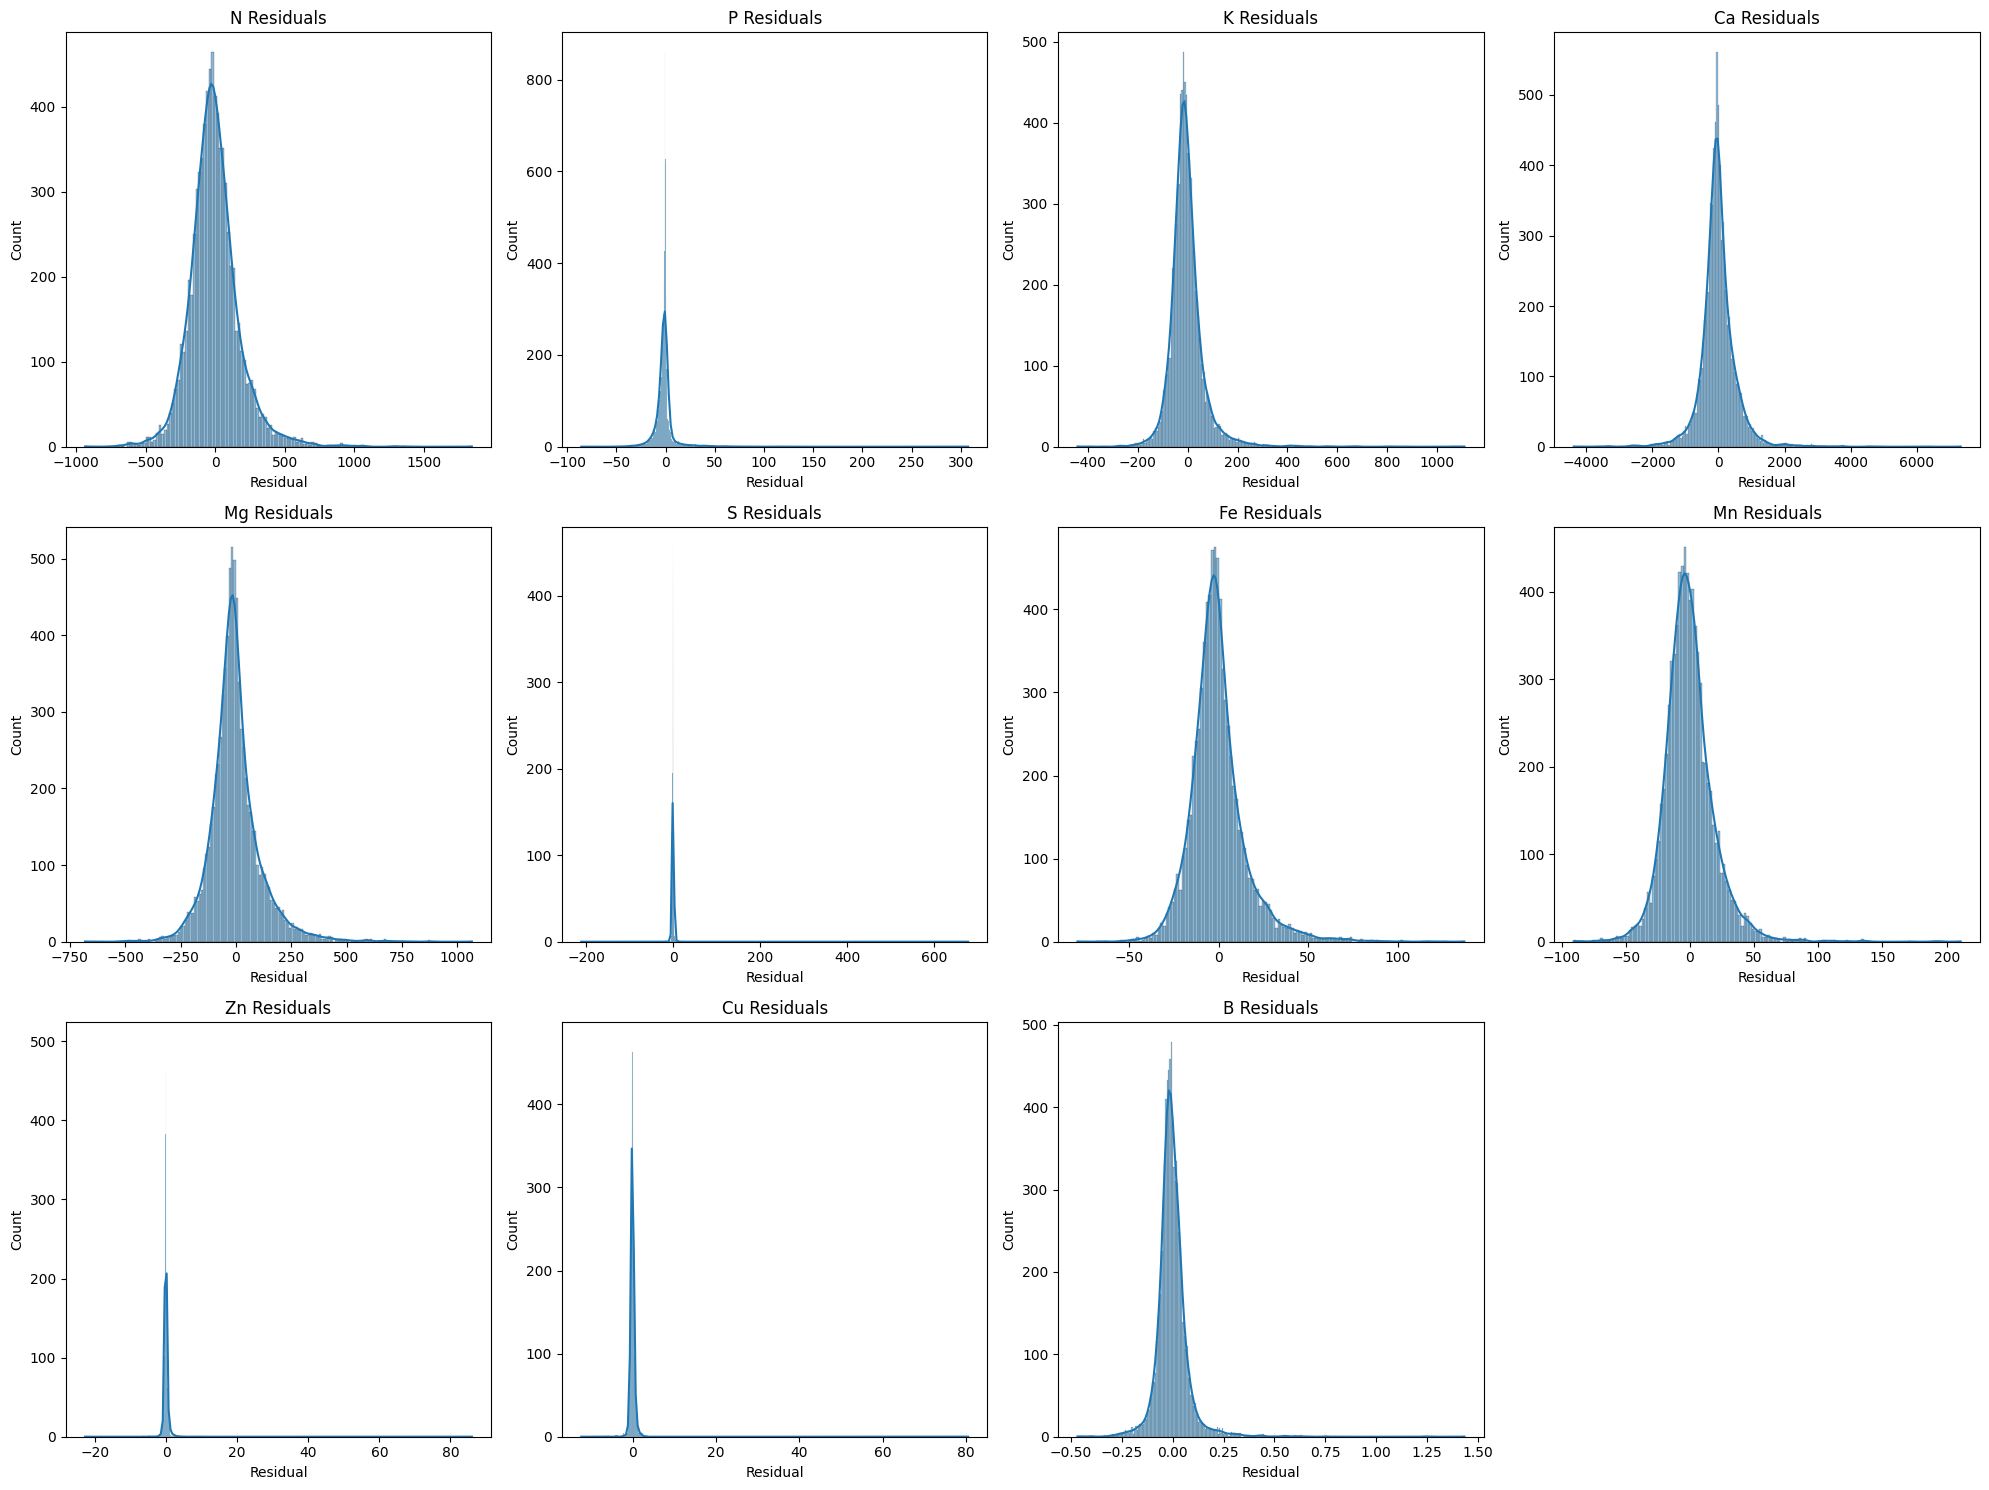

In [57]:
import seaborn as sns

fig, axs = plt.subplots(3, 4, figsize=(20, 15))
axs = axs.flatten()

for i, col in enumerate(target_columns):
    residuals = y_true[:, i] - y_pred[:, i]
    sns.histplot(residuals, kde=True, ax=axs[i])
    axs[i].set_title(f'{col} Residuals')
    axs[i].set_xlabel('Residual')

# Remove unused subplot if any
for j in range(len(target_columns), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


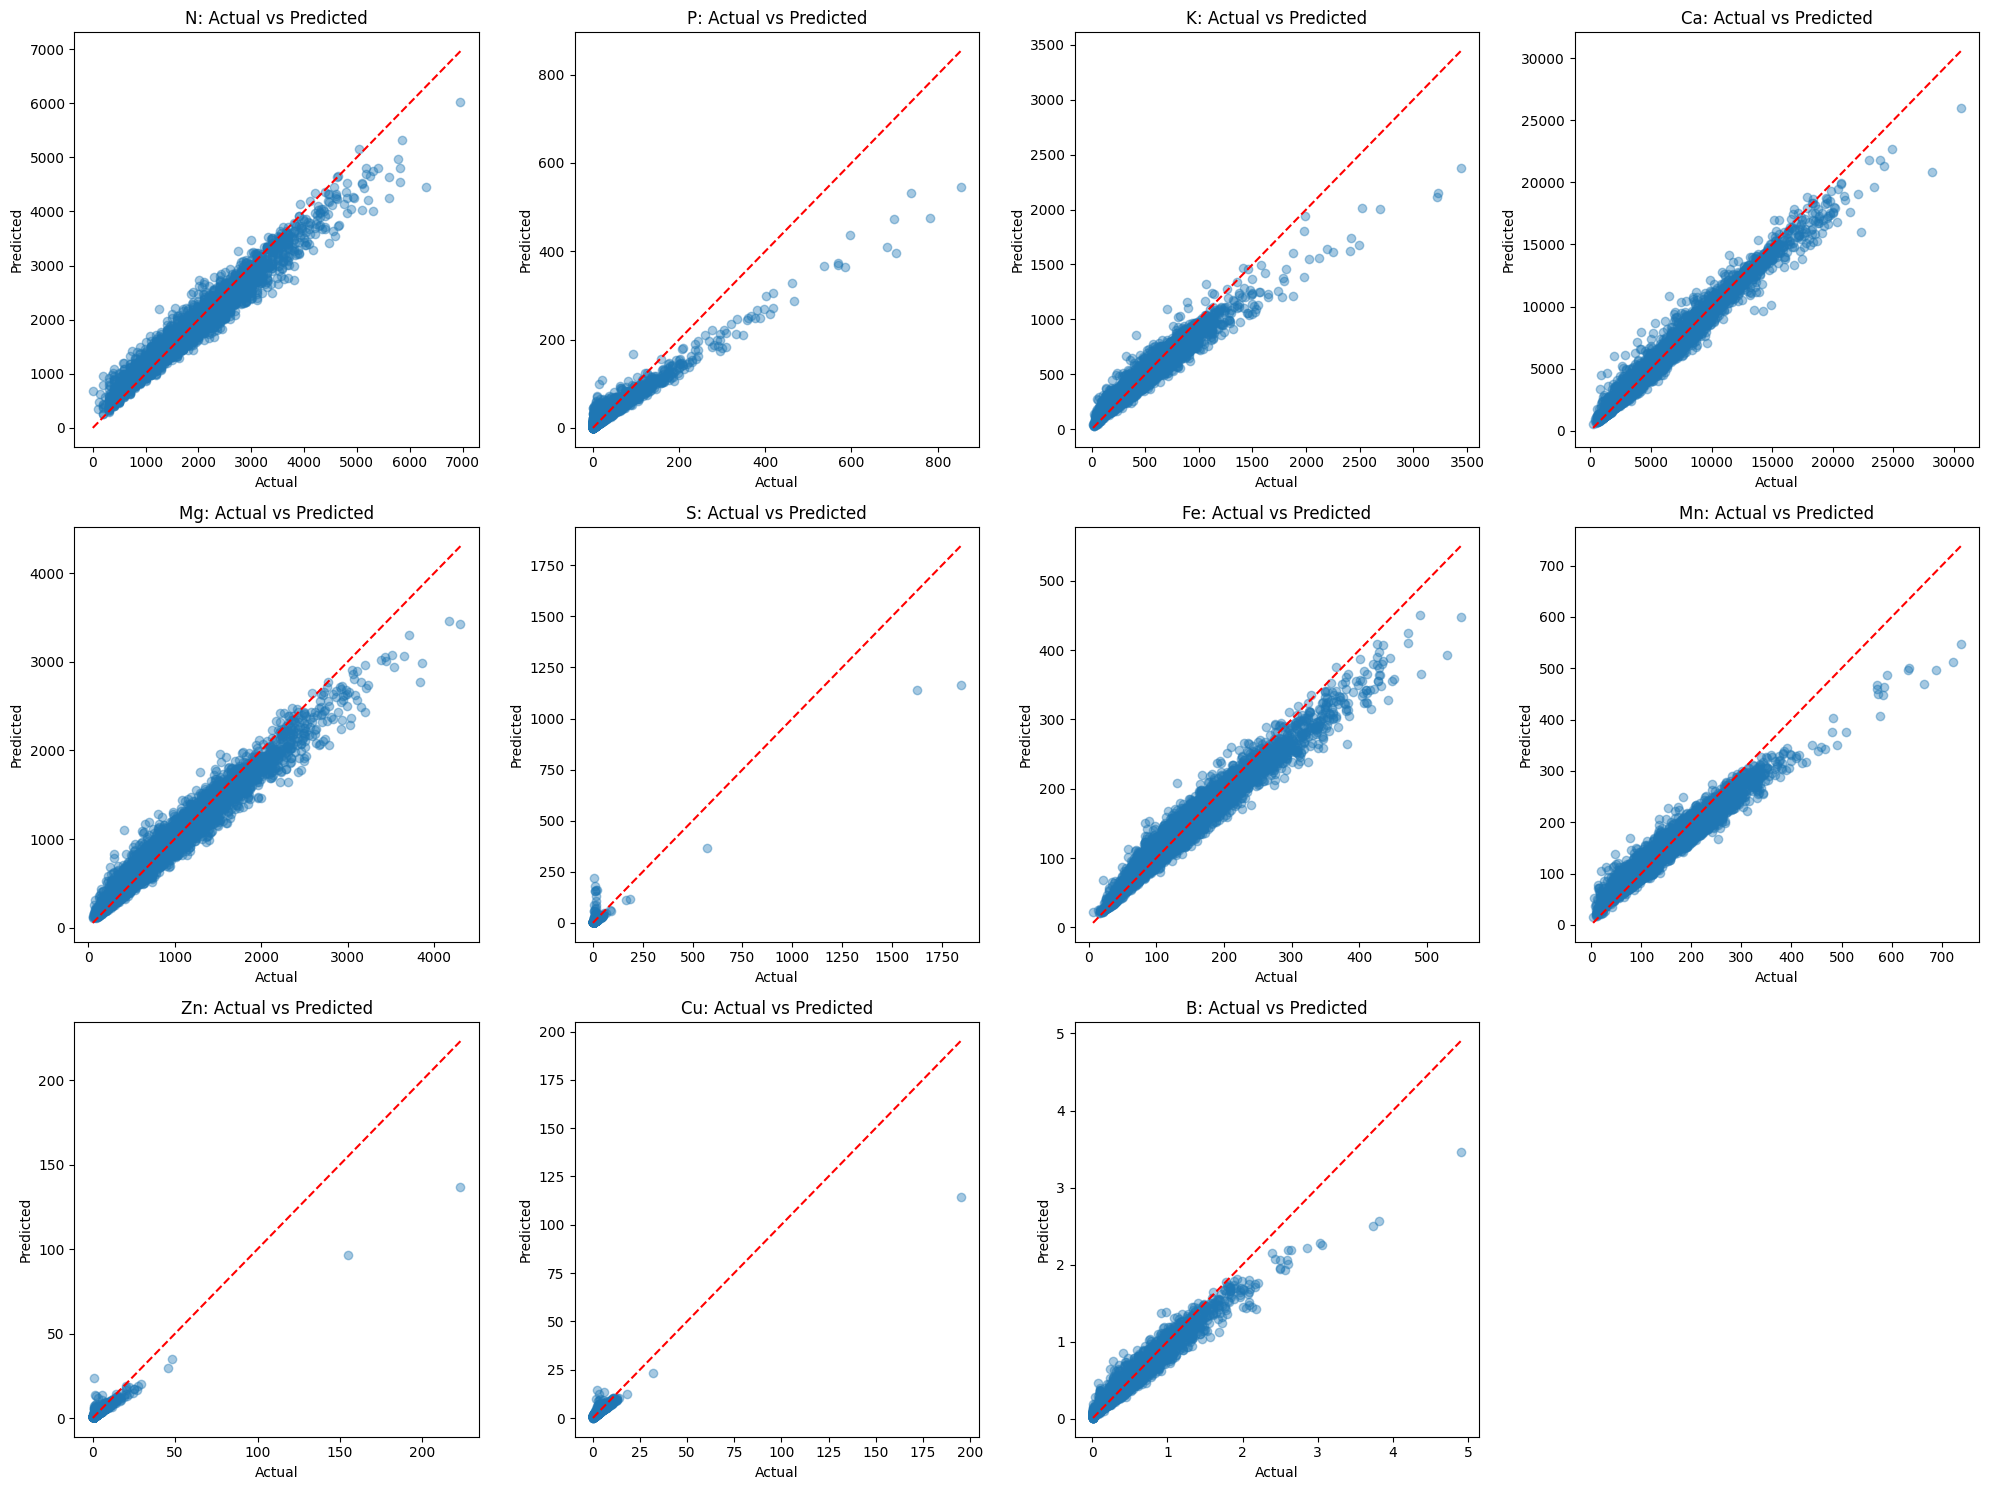

In [56]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # 3 rows, 4 columns = 12 slots
axs = axs.flatten()

for i, col in enumerate(target_columns):
    axs[i].scatter(y_true[:, i], y_pred[:, i], alpha=0.4)
    axs[i].plot([y_true[:, i].min(), y_true[:, i].max()],
                [y_true[:, i].min(), y_true[:, i].max()], 'r--')
    axs[i].set_title(f'{col}: Actual vs Predicted')
    axs[i].set_xlabel('Actual')
    axs[i].set_ylabel('Predicted')

# Remove unused subplot if any
for j in range(len(target_columns), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()



In [44]:
# Convert ppm to kg/ha
depth_cm = 20
bulk_density = test_df["BulkDensity"].values.reshape(-1, 1)  # shape (n_samples, 1)

available_kg_ha = predictions * depth_cm * bulk_density * 0.1
available_kg_ha = pd.DataFrame(available_kg_ha, columns=target_columns)


In [45]:
# Required nutrients uptake
uptake_per_ton = {
    'N': 20, 'P': 3.8, 'K': 25, 'Ca': 3, 'Mg': 3, 'S': 2.8,
    'Fe': 0.25, 'Mn': 0.3, 'Zn': 0.15, 'Cu': 0.03, 'B': 0.02
}


In [46]:
required_kg_ha = {k: v * 4 for k, v in uptake_per_ton.items()}


In [47]:
# Nutrient gap
gap_df = available_kg_ha.copy()

for col in target_columns:
    gap_df[col] = required_kg_ha[col] - available_kg_ha[col]


In [48]:
# Flatten into long format
gap_long = gap_df.copy()
gap_long["PID"] = test_df["PID"]

submission = gap_long.melt(id_vars=["PID"], var_name="Nutrient", value_name="Gap")
submission["PID"] = submission["PID"] + "_" + submission["Nutrient"]
submission = submission[["PID", "Gap"]]


In [49]:
print(submission.head())

           PID       Gap
0  ID_NGS9Bx_N -4275.760
1  ID_YdVKXw_N -3362.488
2  ID_MZAlfE_N -4632.622
3  ID_GwCCMN_N -4692.396
4  ID_K8sowf_N -3652.804


In [50]:
# Save to CSV
submission.to_csv("nutrient_gap_submission.csv", index=False)